# Using Machine Learning Techniques to Predict Customer Churn Rates

## 1. Data Preprocessing and Cleaning

### Data Review and Configuration

In [1]:
# Importing necessary libraries for data analysis and inspection
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
# Displaying basic information about the dataset to understand its structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
# Displaying the first few rows to inspect initial values and data format
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Handling Missing and Outlier Values

In [5]:
# To detect missing values, we display the number of missing data in each column.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# We examine the distribution of missing data by calculating the percentage of missing values.
(df.isnull().sum() / len(df)) * 100

RowNumber          0.000000
CustomerId         0.000000
Surname            0.000000
CreditScore        0.000000
Geography          0.009998
Gender             0.000000
Age                0.009998
Tenure             0.000000
Balance            0.000000
NumOfProducts      0.000000
HasCrCard          0.009998
IsActiveMember     0.009998
EstimatedSalary    0.000000
Exited             0.000000
dtype: float64

In [7]:
# We look at summary statistics for numerical variables like 'CreditScore' and 'Age' to spot outliers.
# This helps us understand the distribution of values ​​and identify extremes.
df[["CreditScore", "Age", "Balance", "EstimatedSalary"]].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10002.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922311,76491.112875,100083.331145
std,96.661615,10.487200,62393.474144,57508.117802
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,50983.750000
50%,652.000000,37.000000,97198.540000,100185.240000
75%,718.000000,44.000000,127647.840000,149383.652500
max,850.000000,92.000000,250898.090000,199992.480000


In [8]:
# Because missing values ​​are few and have minimal impact, we fill them with the most frequent value.
df["Geography"].fillna(df["Geography"].mode()[0], inplace=True)  # We fill in using the most frequently occurring value.
df["Age"].fillna(df["Age"].median(), inplace=True)  # We fill the age column with the median value.
df["HasCrCard"].fillna(df["HasCrCard"].mode()[0], inplace=True)  # We fill in the most frequently occurring value.
df["IsActiveMember"].fillna(df["IsActiveMember"].mode()[0], inplace=True)  # We fill in the most frequently occurring value.

In [9]:
# We check for missing values ​​again to verify that the missing values ​​were filled successfully.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Feature Encoding

In [10]:
# Numerical coding is needed for categorical variables to be used in the model.
# 'We encode the "Geography" variable using the one-hot encoding method.
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

In [11]:
# We encode the "Gender" variable with the binary encoding method. We arrange it so that Female=0, Male=1.
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

In [12]:
# We display the first few lines to verify that the encoding was successful.
df_encoded_head = df.head()

df_encoded_head

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False
1,2,15647311,Hill,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True
2,3,15619304,Onio,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True


### Data Standardization

In [13]:
# Scaling numeric variables helps models perform better.
# Using StandardScaler, we scale numeric columns such as "CreditScore", "Age", "Balance", "EstimatedSalary".

from sklearn.preprocessing import StandardScaler

# We determine the numeric columns to be standardized
numeric_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
scaler = StandardScaler()

In [14]:
# We apply the scaling operation and save the new values ​​to the dataset
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# We display the first few rows of the scaled dataset.
df_scaled_head = df.head()

df_scaled_head

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.326465,0,0.293518,2,-1.226009,1,1.0,1.0,0.022008,1,False,False
1,2,15647311,Hill,-0.440270,0,0.198154,1,0.117274,1,0.0,1.0,0.216663,0,False,True
2,3,15619304,Onio,-1.536934,0,0.293518,8,1.333054,3,1.0,0.0,0.240817,1,False,False
3,4,15701354,Boni,0.501205,0,0.007427,1,-1.226009,2,0.0,0.0,-0.108802,0,False,False
4,5,15737888,Mitchell,2.063434,0,0.388882,2,0.785694,1,1.0,1.0,-0.365171,0,False,True


## 2. Exploratory Data Analysis (EDA)

### Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


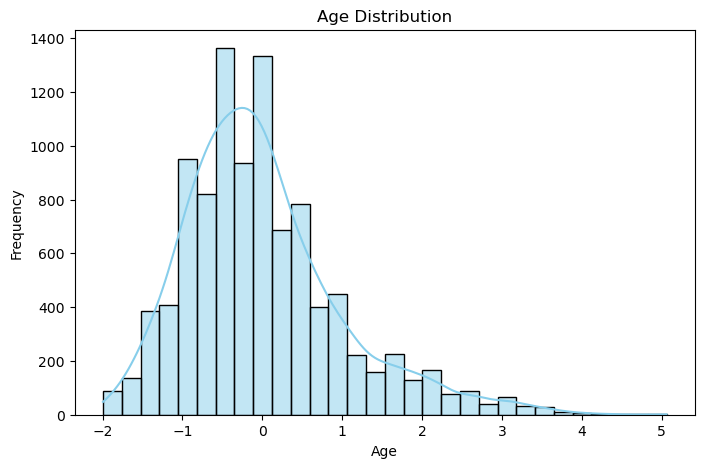

In [16]:
# We visualize the age distribution in the dataset
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Age Distribution: We have analyzed the distribution of customer ages. This distribution helps us understand the age range and concentration areas of the customer portfolio.

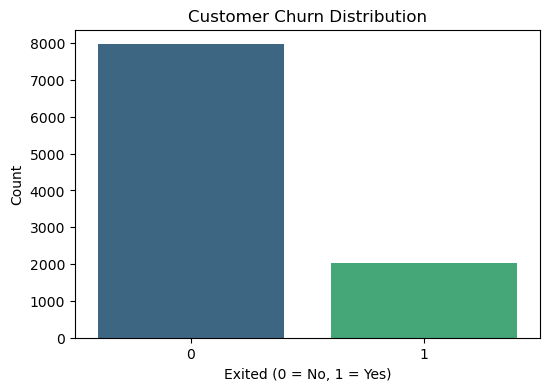

In [17]:
# We visualize the customer churn rate (Exited variable)
plt.figure(figsize=(6, 4))
sns.countplot(x="Exited", data=df, palette="viridis")
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Churn Rate (Exited): By visualizing the churn rate, we examined the overall distribution of churn rate in the data.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

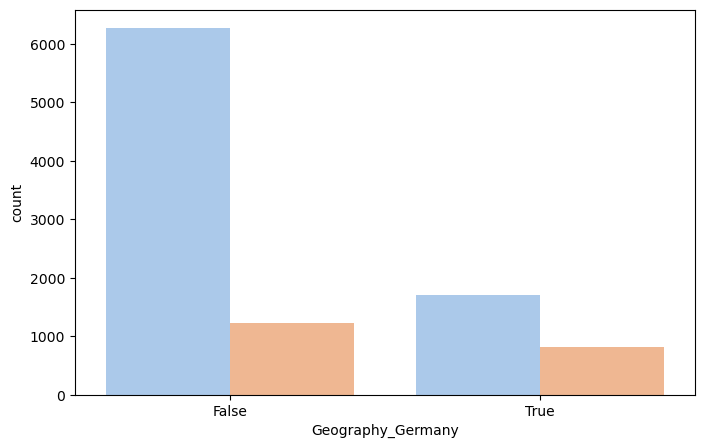

In [18]:
# We analyze churn rate by "Geography" column
plt.figure(figsize=(8, 5))
sns.countplot(x="Geography_Germany", hue="Exited", data=df, palette="pastel")
plt.title("Customer Churn by Geography (Germany)")
plt.xlabel("Geography Germany (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()

Coğrafya ve Müşteri Kaybı (Geography_Germany): Almanya’daki müşterilerin churn oranını analiz ettik. Coğrafyanın müşteri kaybına olan etkisini bu yolla değerlendirebiliriz.

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


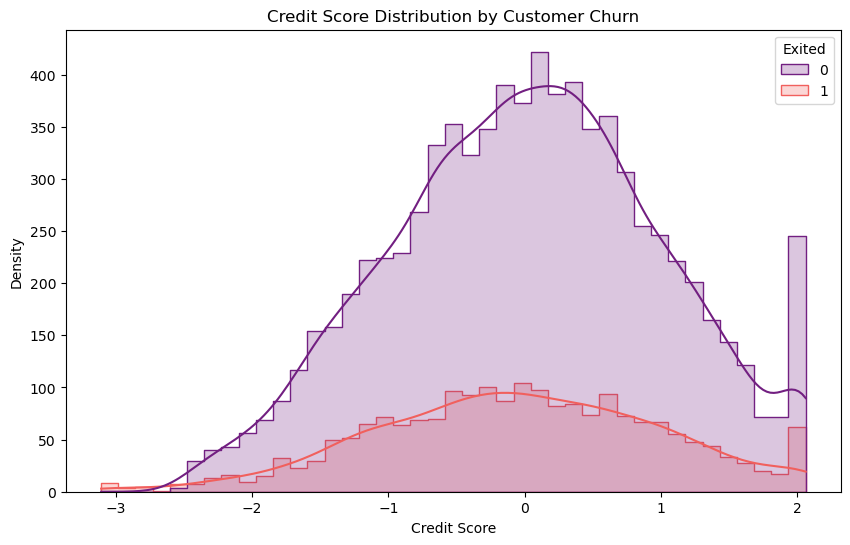

In [19]:
# Visualizing "CreditScore" distribution by customer churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="CreditScore", hue="Exited", kde=True, element="step", palette="magma")
plt.title("Credit Score Distribution by Customer Churn")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

Credit Score and Customer Churn: We examined the relationship between credit score and customer churn by visualizing the credit score distribution by customer churn.

### Customer Churn Analysis

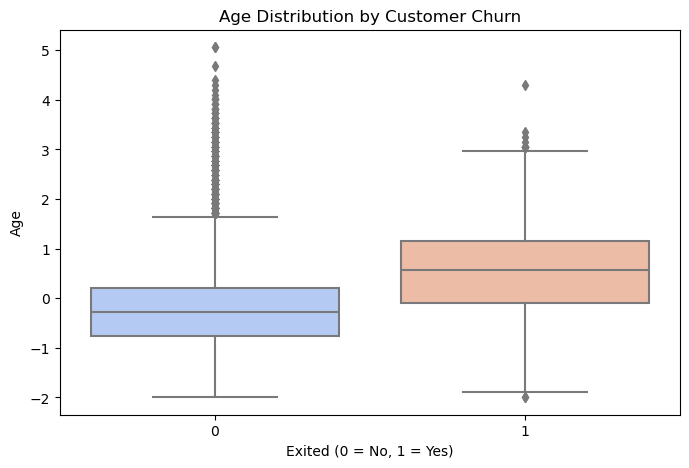

In [20]:
# We analyze the impact of churn and non-churn groups on numerical variables
# We compare the distribution of churning and non-churning customers according to the "Age" variable
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Age", data=df, palette="coolwarm")
plt.title("Age Distribution by Customer Churn")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

Age Distribution: It is observed that the average age of the group experiencing customer churn is slightly higher than the other group. Age can play an important role in customer churn.

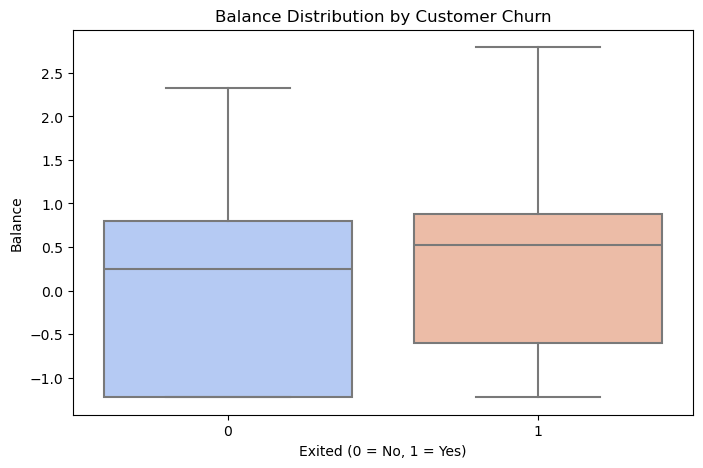

In [21]:
# We compare the average and distribution of churning and non-churning customers according to the "Balance" variable
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Balance", data=df, palette="coolwarm")
plt.title("Balance Distribution by Customer Churn")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Balance")
plt.show()

Balance Distribution: It was observed that the balance of the group experiencing customer churn was generally higher than the other group. The balance amount may affect the customer's tendency to leave the service.

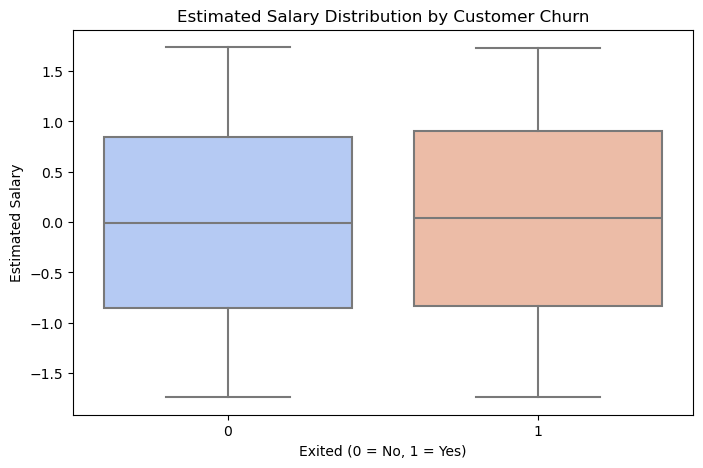

In [22]:
# Analyze the relationship between "EstimatedSalary" and churn status
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="EstimatedSalary", data=df, palette="coolwarm")
plt.title("Estimated Salary Distribution by Customer Churn")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Estimated Salary")
plt.show()

Estimated Salary: No significant difference in salary was observed between the groups that experienced and did not experience churn.

In [23]:
# We get more information by examining average values ​​​​by Churn status
df.groupby("Exited")[["Age", "Balance", "EstimatedSalary", "CreditScore"]].mean()

,Age,Balance,EstimatedSalary,CreditScore
Exited,,,,
0,-0.144335,-0.059923,-0.006133,0.013612
1,0.564027,0.234164,0.023965,-0.053193


## 3. Feature Engineering

### Creating New Features

In [24]:
# We are creating a new feature called "CreditAge".
# This feature combines the customer's credit score and age to provide more meaningful information about customer reliability.
df["CreditAge"] = df["CreditScore"] * df["Age"]

CreditAge: A feature created by multiplying credit score and age. This feature aims to provide more detailed information about customer reliability and credit history.

In [25]:
# We are building a feature called 'BalanceTenure' to measure customer mobility.
# This feature provides a more detailed financial analysis by comparing customer balance to annual customer loyalty duration.
df["BalanceTenure"] = df["Balance"] / (df["Tenure"] + 1)  # We add +1 to prevent division error.

BalanceTenure: This feature, which is obtained by dividing the customer's balance by the customer loyalty period, can help us better understand the customer's financial behavior.

In [26]:
# We display the first few rows to verify that the new features have been added to the dataset.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,CreditAge,BalanceTenure
0,1,15634602,Hargrave,-0.326465,0,0.293518,2,-1.226009,1,1.0,1.0,0.022008,1,False,False,-0.095824,-0.408670
1,2,15647311,Hill,-0.440270,0,0.198154,1,0.117274,1,0.0,1.0,0.216663,0,False,True,-0.087241,0.058637
2,3,15619304,Onio,-1.536934,0,0.293518,8,1.333054,3,1.0,0.0,0.240817,1,False,False,-0.451118,0.148117
3,4,15701354,Boni,0.501205,0,0.007427,1,-1.226009,2,0.0,0.0,-0.108802,0,False,False,0.003722,-0.613004
4,5,15737888,Mitchell,2.063434,0,0.388882,2,0.785694,1,1.0,1.0,-0.365171,0,False,True,0.802432,0.261898


### Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# We select the best features with the highest correlation with the target variable (Exited).
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])  # Remove columns that are not required for the model
y = df["Exited"]

In [28]:
# We use SelectKBest to select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [29]:
# We display the column names of the selected features
selected_features = X.columns[selector.get_support()]

selected_features

Index(['CreditScore', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'Geography_Germany', 'Geography_Spain', 'CreditAge',
       'BalanceTenure'],
      dtype='object')

## 4. Modeling and Evaluation

### Splitting the Dataset

In [30]:
from sklearn.model_selection import train_test_split

# We divide our dataset containing the best selected features into training and test sets.
X_selected = df[selected_features]  # Only selected features are used
y = df["Exited"]

In [31]:
# We split the training and test sets by 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# We display the sizes of training and test sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((7001, 10), (3001, 10)), ((7001,), (3001,)))

### Applying Algorithms

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [33]:
# We define models
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

In [34]:
# We train models on training and test sets and calculate accuracy rates
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "Support Vector Machine": svm_model,
    "K-Nearest Neighbors": knn_model,
    "Gradient Boosting": gradient_boosting_model
}

In [35]:
# We create a dictionary to store accuracy rates to evaluate model performance
model_accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Calculating and storing accuracy rate
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

model_accuracies

{'Logistic Regression': 0.8083972009330224,
 'Random Forest': 0.8653782072642453,
 'Support Vector Machine': 0.862379206931023,
 'K-Nearest Neighbors': 0.8347217594135288,
 'Gradient Boosting': 0.8683772075974675}

### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# We select our model for hyperparameter adjustments (Random Forest was one of the best results)
# We determine the hyperparameter range for Random Forest
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

In [37]:
# We find the best hyperparameters with GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, 
                              scoring="accuracy", 
                              cv=5, 
                              n_jobs=-1,
                              verbose=1)

In [38]:
# We train the model
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [39]:
# We get the best parameters and the best accuracy rate
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

({'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100},
 0.8654481492811257)

In [40]:
### Hyperparameter Tuning for Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# We specify the hyperparameter range for Gradient Boosting
param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

In [41]:
# Finding the best hyperparameters for Gradient Boosting with GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), 
                              param_grid=param_grid_gb, 
                              scoring="accuracy", 
                              cv=5, 
                              n_jobs=-1,
                              verbose=1)

In [42]:
# We train the model
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [43]:
# We get the best parameters and the best accuracy rate
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_params_gb, best_score_gb

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200},
 0.8628772305496074)

The accuracy rate obtained with the best hyperparameter settings in the Random Forest model is approximately 0.865. This rate is not lower than the adjusted result we got in the Gradient Boosting model and is quite close.

Random Forest is generally faster and more resistant to overfitting. Therefore, it would be advantageous to continue with this model, especially in large data sets and when we want to get faster results.

### Model Performance Evaluation Metrics

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# We retrain the models we determined as our final model with the best selected hyperparameters.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10, random_state=42)
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

In [45]:
# Training the models with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [46]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [47]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [48]:
# We make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  

y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  

y_pred_gb = gradient_boosting_model.predict(X_test)
y_prob_gb = gradient_boosting_model.predict_proba(X_test)[:, 1]  

In [49]:
# We calculate performance metrics
metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf)
}

metrics_logistic = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic),
    "ROC-AUC": roc_auc_score(y_test, y_prob_logistic)
}

metrics_gb = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb),
    "Recall": recall_score(y_test, y_pred_gb),
    "F1 Score": f1_score(y_test, y_pred_gb),
    "ROC-AUC": roc_auc_score(y_test, y_prob_gb)
}

In [50]:
# We display the results in a table form
model_performance_df = pd.DataFrame([metrics_logistic, metrics_gb, metrics_rf], 
                                    index=["Logistic Regression", "Gradient Boosting", "Random Forest"])

model_performance_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.808397,0.555556,0.208333,0.303030,0.762621
Gradient Boosting,0.869044,0.760705,0.503333,0.605817,0.859373
Random Forest,0.867711,0.759591,0.495000,0.599395,0.852010


Gradient Boosting gave the best results in Accuracy, Recall, F1 Score and ROC-AUC metrics.
Random Forest gave very close results to Gradient Boosting and has the second best performance.
Logistic Regression showed lower performance especially in terms of Recall and F1 Score, indicating that it has a lower fit as a simpler model.
As a result, Gradient Boosting stands out as the best performing model, followed by Random Forest.

## 5. Results Interpretation and Analysis

### Selection and Interpretation of the Best Model

In [51]:
# Gradient Boosting is selected as the best performing model
# To better interpret this model, we analyze feature importance

# Obtaining feature importances
feature_importances = gradient_boosting_model.feature_importances_

In [52]:
# Convert feature names and their importance into a table
feature_importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

In [53]:
feature_importance_df.reset_index(drop=True, inplace=True)

feature_importance_df

,Feature,Importance
0,Age,0.361602
1,NumOfProducts,0.271705
2,IsActiveMember,0.105740
3,Balance,0.075760
4,Geography_Germany,0.055337
5,BalanceTenure,0.049170
6,CreditAge,0.034782
7,CreditScore,0.029762
8,Gender,0.013061
9,Geography_Spain,0.003081


Feature Importances: According to the Gradient Boosting model, the contribution levels of the features to the model are as follows:

Age: The feature with the highest importance of 36.2%. Age is seen to have a major impact on customer churn.
NumOfProducts: Second place with an importance rate of 27.2%. The number of products that customers own can be an important factor affecting customer loyalty.
IsActiveMember: Third place with an importance rate of 10.6%. Whether the customer is an active member or not affects the probability of churn.
Balance and Geography_Germany also have an importance of over 5% and contribute to customer churn.
Less important features are listed as CreditAge, CreditScore, Gender, and Geography_Spain. These features contributed less to the model but supported the overall model performance.

In [54]:
# We do the same process in Random Forest model to analyze feature importance

# Obtaining feature importance in Random Forest model
feature_importances_rf = rf_model.feature_importances_

In [55]:
# Convert feature names and their importance into a table
feature_importance_rf_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": feature_importances_rf
}).sort_values(by="Importance", ascending=False)

feature_importance_rf_df.reset_index(drop=True, inplace=True)

feature_importance_rf_df

,Feature,Importance
0,Age,0.261518
1,NumOfProducts,0.168810
2,BalanceTenure,0.118295
3,Balance,0.115457
4,CreditAge,0.112340
5,CreditScore,0.108016
6,IsActiveMember,0.053311
7,Geography_Germany,0.034169
8,Gender,0.017763
9,Geography_Spain,0.010321


Random Forest Model Feature Importance:

Age: It stands out as the most important feature with 26.2%.
NumOfProducts: It ranks second with 16.9%.
BalanceTenure and Balance: These features are important at 11% levels.
CreditAge and CreditScore: These features also contribute at approximately 10% level.
Features such as Age, NumOfProducts, BalanceTenure, Balance, CreditAge, and CreditScore make significant contributions in the Random Forest model.

In [56]:
# Examining feature importance for Logistic Regression
# Importance can be assessed using coefficients of features in Logistic Regression
# Therefore we use absolute values ​​because coefficients can be positive or negative

logistic_coefficients = logistic_model.coef_[0]  
feature_importance_logistic_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": abs(logistic_coefficients)  
}).sort_values(by="Importance", ascending=False)

In [57]:
feature_importance_logistic_df.reset_index(drop=True, inplace=True)

feature_importance_logistic_df

,Feature,Importance
0,IsActiveMember,1.029699
1,Geography_Germany,0.778756
2,Age,0.766089
3,Gender,0.546966
4,Balance,0.200604
5,NumOfProducts,0.110906
6,Geography_Spain,0.067782
7,CreditScore,0.054468
8,CreditAge,0.040059
9,BalanceTenure,0.017121


Logistic Regression Model Feature Importance:

IsActiveMember: The feature with the highest coefficient and the most significant effect on the model.

Geography_Germany and Age: These features also have significant coefficients.
Gender and Balance: Features with lower importance but supporting model performance.

While the IsActiveMember feature has the most significant effect in the Logistic Regression model, demographic features such as Geography_Germany and Age also make significant contributions.

Summary
Age and IsActiveMember features are among the prominent factors in Gradient Boosting, Random Forest and Logistic Regression models. However, the order of importance of some features may vary depending on the structure of the model. These analyses help us understand the main factors affecting customer churn.

Evaluation of Results from a Business Perspective
The models we apply to predict customer churn can help us better understand customer behavior and identify risky customers in advance. Some important points that these analyses can contribute to the business world are summarized below:

1. Strategies to Increase Customer Loyalty
Determining Risky Customer Segments: Features such as age, customer product count (NumOfProducts), active membership status (IsActiveMember) and customer balance play an important role in customer churn. Models can identify customers with high churn risk based on these features. The business can prevent customers in this segment from leaving by offering special loyalty campaigns or personalized offers.
Studies on Age and Product Diversification: Age has emerged as an important factor, especially in Gradient Boosting and Random Forest models. Offering more attractive products to young customers or special services to older customers can increase loyalty. Since product diversity also contributes to customer loyalty, new product options can be offered to meet the needs of customers.
2. Marketing and Customer Experience Improvements
Personalized Marketing: Since our models can identify risk groups based on customer profiles, marketing campaigns can be customized to these profiles. For example, if it is observed that German customers are at higher risk of churn, special offers and benefits can be offered for this segment.

Improving Customer Experience: Given that the churn rate is higher for inactive customers, it is important to improve customer interaction channels. This can be done by providing better support to customers, establishing fast feedback mechanisms and continuously monitoring customer satisfaction.

3. Workforce and Cost Management
Effective Use of Resources: By focusing on customer segments with a high churn risk, marketing and customer service resources can be used more effectively. For example, loyalty campaigns can be made more efficient by focusing on high-risk customers.

Cost Management: With the predictions provided by the models, the business can optimize costs to prevent customer churn. Loyalty programs and customer retention campaigns can be structured to target only high-risk customers, which allows for better cost management.
4. Future Improvement Areas and Additional Analytics
Model Improvement by Adding Additional Features: Data that can provide more insight into customer behavior, such as customer feedback or past purchase frequency, can further improve model performance.
Time Series Analytics: Seeing how customer churn changes over time can help us understand whether there are more churns in certain periods. Based on this information, seasonal campaigns or strategies to increase customer loyalty in certain periods can be developed.
Developing Models for Different Segments: Separate models can be developed for countries or age groups to make more specific and accurate predictions. For example, a separate model can be created for German customers.
Integration with Customer Lifetime Value (CLV) Analytics: Customer churn prevention strategies can be optimized by also considering the potential lifetime value of the customer. This can lead to investing more in high-CLV customers and implementing less costly strategies for low-CLV customers.

With these assessments, the business can strengthen customer loyalty, minimize churn risk, and make marketing strategies more efficient. These predictions provided by the models will be of great benefit in planning customer-focused strategies.